# Imports

In [1]:
import pathlib

# Constants

In [2]:
PROJECT_DIR = pathlib.Path('~/work').expanduser()
DATA_DIR = PROJECT_DIR / 'data'

In [3]:
# https://rstudio-pubs-static.s3.amazonaws.com/120883_c8123ff272164b2a94be097a6237150b.html
YELP_DATA_DIR = DATA_DIR / 'yelp' / 'v6' / 'yelp_dataset_challenge_academic_dataset'

# Example 2-2

Visualizing business review counts in the Yelp dataset

In [4]:
import json
import pandas as pd

In [5]:
# Load the data about businesses
with open(YELP_DATA_DIR / 'yelp_academic_dataset_business.json') as biz_file:
    biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

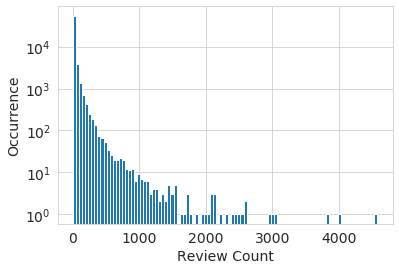

In [7]:
# Plot the histogram of the review counts
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)
plt.show()

# Example 2-3

Quantizing counts with fixed-width bins

In [8]:
import numpy as np

In [9]:
# Generate 20 random integers uniformly between 0 and 99
small_counts = np.random.randint(0, 100, 20)
small_counts

array([10, 20, 91, 32,  5, 62, 20, 31,  6, 60, 44, 95, 41, 34, 98, 96, 94,
       32, 29, 89])

In [10]:
# Map to evenly spaced bins 0-9 by division
np.floor_divide(small_counts, 10)

array([1, 2, 9, 3, 0, 6, 2, 3, 0, 6, 4, 9, 4, 3, 9, 9, 9, 3, 2, 8])

In [11]:
# An array of counts that span several magnitudes
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]

In [12]:
# Map to exponential-width bins via the log function
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

# Example 2-4

Computing deciles of Yelp business review counts

In [13]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     3.0
0.2     4.0
0.3     5.0
0.4     6.0
0.5     8.0
0.6    12.0
0.7    17.0
0.8    28.0
0.9    58.0
Name: review_count, dtype: float64

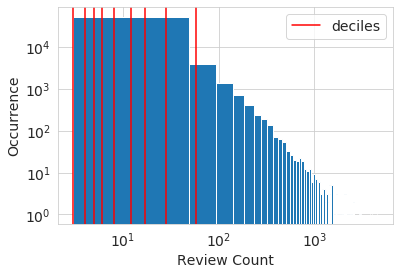

In [14]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)
plt.show()

# Example 2-5

Binning counts by quantiles

In [15]:
# Continue example 2-3 with large_counts
import pandas as pd

In [16]:
# Map the counts to quartiles
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3])

In [17]:
# Compute the quantiles themselves
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

## Bike Sharing Dataset

In [18]:
BIKE_DATA_DIR = DATA_DIR / 'bike_sharing'

In [19]:
bike_df = pd.read_csv(BIKE_DATA_DIR / 'hour.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


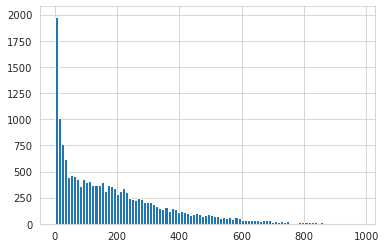

In [20]:
fig, ax = plt.subplots()
bike_df['cnt'].hist(ax=ax, bins=100)
plt.show()

In [21]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [22]:
categorical_cols = ['season', 'weathersit']
bike_df = pd.get_dummies(bike_df, prefix=categorical_cols, columns=categorical_cols)

In [23]:
bike_df.head()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,...,registered,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,1,0,0,6,0,0.24,0.2879,...,13,16,1,0,0,0,1,0,0,0
1,2,2011-01-01,0,1,1,0,6,0,0.22,0.2727,...,32,40,1,0,0,0,1,0,0,0
2,3,2011-01-01,0,1,2,0,6,0,0.22,0.2727,...,27,32,1,0,0,0,1,0,0,0
3,4,2011-01-01,0,1,3,0,6,0,0.24,0.2879,...,10,13,1,0,0,0,1,0,0,0
4,5,2011-01-01,0,1,4,0,6,0,0.24,0.2879,...,1,1,1,0,0,0,1,0,0,0


In [24]:
bike_df['log_cnt'] = np.log(bike_df['cnt'])

In [25]:
features = ['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
            'season_1', 'season_2', 'season_3', 'season_4',
            'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4']
train, validate = model_selection.train_test_split(bike_df, test_size=0.2)

In [26]:
validate.shape

(3476, 24)

In [27]:
train.shape

(13903, 24)

In [28]:
lin_model = linear_model.LinearRegression()
lin_model.fit(train[features], train['cnt'])
log_lin_model = linear_model.LinearRegression()
log_lin_model.fit(train[features], train['log_cnt'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_true_lin = validate['cnt']
y_pred_lin = lin_model.predict(validate[features])
y_pred_lin[y_pred_lin < 0] = 0

In [30]:
y_true_log = validate['log_cnt']
y_pred_log = log_lin_model.predict(validate[features])

In [31]:
# The sum of squares of the log residual errors
print("Log residual sum of squares: %.2f"
      % metrics.mean_squared_log_error(y_true_lin, y_pred_lin))

Log residual sum of squares: 2.02


In [32]:
# The sum of squares of the log residual errors
print("Log residual sum of squares: %.2f"
      % metrics.mean_squared_log_error(np.exp(y_true_log), np.exp(y_pred_log)))

Log residual sum of squares: 1.43
